In [1]:
from fastai.vision.all import *
import fastai
import timm
import pandas as pd

In [2]:
import torch
torch.cuda.set_device(1)

In [3]:
df = pd.read_csv('../dataset.csv')

In [4]:
df = df.drop(df[df.masa<0].index)

In [7]:
dftrain = df[(df.split=='train') | (df.split=='valid')]
dftest = df[(df.split=='test')]

In [7]:
# !mkdir ../datasetClean/train
# !mkdir ../datasetClean/test

In [8]:
# import shutil
# from imutils import paths

In [9]:
# for image in dftrain.image_id.values:
#     shutil.move(image.replace('datasetClean','../datasetClean'),
#                 image.replace('datasetClean','../datasetClean/train'))

In [10]:
# for image in dftest.image_id.values:
#     shutil.move(image.replace('datasetClean','../datasetClean'),
#                 image.replace('datasetClean','../datasetClean/test'))

In [11]:
# df.volumen.describe()

In [8]:
def get_masa(f):
    return float(df[df['image_id']=='datasetClean/'+f.name]['masa'])

def get_volumen(f):
    return float(df[df['image_id']=='datasetClean/'+f.name]['volumen'])

def is_valid(f):
    return (df[df['image_id']=='datasetClean/'+f.name]['split']).values[0]=='valid'

In [13]:
def getDataBlock(presize=512,size=512):
    return DataBlock(blocks = (ImageBlock, RegressionBlock()),
                 get_items=get_image_files, 
                 splitter=FuncSplitter(is_valid),
                 get_y=get_masa,
                 item_tfms = Resize(presize),
                 batch_tfms=[*aug_transforms(size=size,flip_vert=True,
                                            max_zoom=1.0), Normalize.from_stats(*imagenet_stats)])

In [14]:
path = Path('../datasetClean/')
trainPath = path/'train'

In [15]:
db = getDataBlock()
dls = db.dataloaders(trainPath,bs=16)

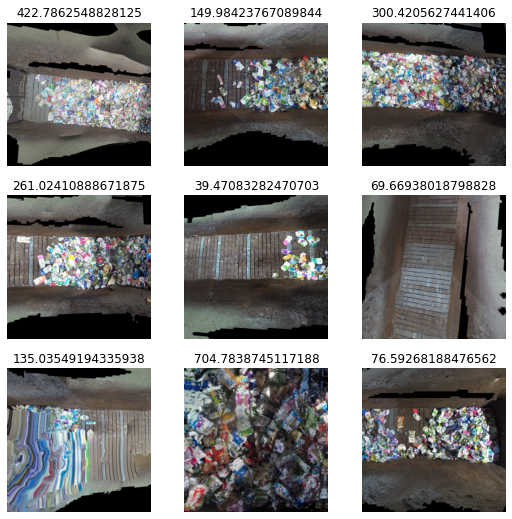

In [16]:
dls.show_batch()

In [17]:
from fastai.vision.all import *
callbacks = [
    ShowGraphCallback(),
    #EarlyStoppingCallback(patience=3),
    SaveModelCallback(fname='resnetrs50Masa')
]

In [18]:
from fastai.metrics import mae

In [19]:
learn = Learner(dls, timm.create_model('resnetrs50',num_classes=1,pretrained=True),
                loss_func=MSELossFlat(), metrics=mae,cbs=callbacks).to_fp16()

In [19]:
# learn.lr_find()

epoch,train_loss,valid_loss,mae,time
0,108524.789062,121245.648438,279.935638,00:10


Better model found at epoch 0 with valid_loss value: 121245.6484375.


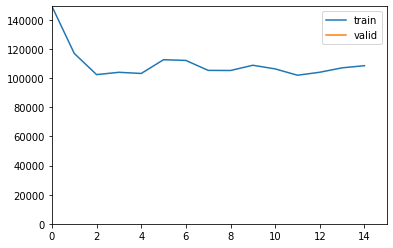

epoch,train_loss,valid_loss,mae,time
0,101256.312500,100586.320312,259.450714,00:06
1,98610.335938,85702.203125,241.691452,00:06
2,95606.593750,90308.875000,247.588577,00:06
3,93476.320312,99738.554688,258.895233,00:06
4,90826.453125,91086.390625,249.609833,00:06
5,87759.921875,85447.007812,242.625488,00:07
6,85153.031250,92905.835938,250.165771,00:06
7,82859.039062,88152.007812,242.637863,00:06
8,80660.671875,65835.601562,216.588058,00:06
9,77120.429688,90032.171875,244.781570,00:07


Better model found at epoch 0 with valid_loss value: 100586.3203125.


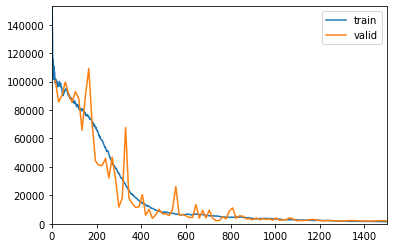

Better model found at epoch 1 with valid_loss value: 85702.203125.
Better model found at epoch 5 with valid_loss value: 85447.0078125.
Better model found at epoch 8 with valid_loss value: 65835.6015625.
Better model found at epoch 12 with valid_loss value: 44125.35546875.
Better model found at epoch 13 with valid_loss value: 41238.97265625.
Better model found at epoch 14 with valid_loss value: 40981.16796875.
Better model found at epoch 16 with valid_loss value: 32252.787109375.
Better model found at epoch 18 with valid_loss value: 31296.90234375.
Better model found at epoch 19 with valid_loss value: 11747.6943359375.
Better model found at epoch 24 with valid_loss value: 11598.3681640625.
Better model found at epoch 27 with valid_loss value: 6060.91943359375.
Better model found at epoch 29 with valid_loss value: 3821.037841796875.
Better model found at epoch 48 with valid_loss value: 2183.403564453125.
Better model found at epoch 80 with valid_loss value: 2147.27197265625.
Better model

In [20]:
learn.fine_tune(100,base_lr=1e-3)

In [21]:
def is_test(f):
    return (df[df['image_id']=='datasetClean/'+f.name]['split']).values[0]=='test'

In [22]:
dbtest = DataBlock(blocks = (ImageBlock, RegressionBlock()),
                 get_items=get_image_files, 
                 splitter=FuncSplitter(is_test),
                 get_y=get_masa,
                 item_tfms = Resize(512),
                 batch_tfms=[*aug_transforms(size=512,flip_vert=True,
                                            max_zoom=1.0), Normalize.from_stats(*imagenet_stats)])

In [23]:
dlstest = dbtest.dataloaders(path,bs=16)

In [24]:
learn.dls=dlstest

In [25]:
learn.validate()

Better model found at epoch 0 with valid_loss value: 37.02676773071289.


(#2) [3390.915283203125,37.02676773071289]

In [26]:
learn.get_preds()

(tensor([[497.0000],
         [492.2500],
         [ 21.1250],
         [249.6250],
         [516.5000],
         [193.7500],
         [581.5000],
         [ 86.8125],
         [211.6250],
         [ 26.0469],
         [ 59.6250],
         [ 31.0000],
         [224.0000],
         [ 39.7500],
         [ 86.5000],
         [384.5000],
         [513.5000],
         [597.0000],
         [218.2500],
         [593.5000],
         [319.7500],
         [546.5000],
         [ 23.1094],
         [183.2500],
         [ 22.4375],
         [244.2500],
         [115.0000],
         [431.7500],
         [336.2500],
         [376.0000],
         [207.0000],
         [582.0000],
         [ 27.8281],
         [188.7500],
         [ 22.7969],
         [325.7500],
         [565.5000],
         [554.5000],
         [546.5000],
         [ 81.0000],
         [100.3125],
         [193.3750],
         [ 28.1875],
         [523.5000],
         [ 33.5000],
         [346.7500],
         [508.0000],
         [387